# Sprint 1 
by Anne-Sophie Howard

In [1]:
# general libraries
import numpy as np
import pandas as pd

# single cell libraries
import scanpy as sc
import anndata as ad

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import seaborn as sns

# Read mtx files
from scipy.io import mmread
from scipy.sparse import csr_matrix

# Lymphoma dataset

In this project we aim at using unsupervised classification from different blood samples, malignant and non malignant, trying to describe more finely the biological status of different lymphoma.
Here we focus and as such the heterogeneity of non-hodgkin B-cell lymphoma which take their origin in the Germinal Center reaction.
In this dataset we have 4 samples of reactive lymphe nodes (non malignant samples), 4 Follicular lymphoma (slow evolving lymphoma), 2 transformed follicular lymphoma (initially classified as follicular lymphoma, the cancer evolved towards a more aggressvie fast growing cancer), and 3 DLBCL (fast growing lymphoma).

In the spring 1 we will describe the samples available: number of cells per sample, type of cells (B or T cells).
We will describe one of the sample  a bit more in details, the  rLN1 sample (non malignant).

In [2]:
# Read the description file
sample_sheet_df = pd.read_csv("data_FL\AnnotationCells.csv", delimiter = ";")

In [3]:
sample_sheet_df.head()

,Sample,Barcode,Population
0,DLBCL1,AAACCTGAGCCATCGC,MalignantB
1,DLBCL1,AAACCTGAGCCTTGAT,MalignantB
2,DLBCL1,AAACCTGGTTAAGATG,MalignantB
3,DLBCL1,AAACCTGGTTAAGGGC,MalignantB
4,DLBCL1,AAACCTGTCATTTGGG,MalignantB


In [4]:
sample_sheet_df.shape

(26594, 3)

The dataset contains 26594 cells. We will take a look a the number of cells for each kind of sample.

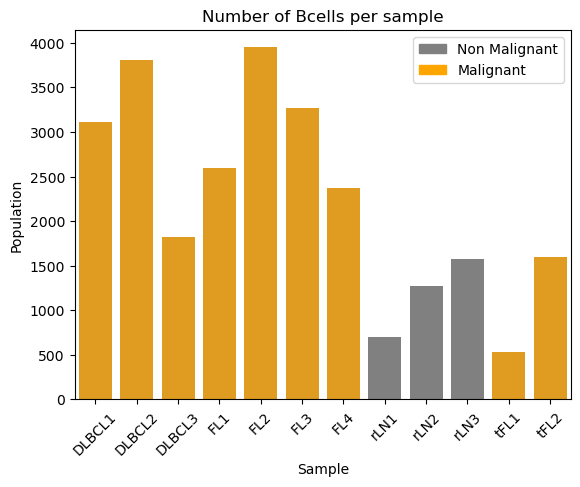

In [5]:
# We differentiate the malignant and non malignant samples
cell_number_df = sample_sheet_df.groupby('Sample')['Population'].count().reset_index()

cols = ['grey' if ((x == "rLN1" )| (x== "rLN2" )| (x == "rLN3")) else 'orange' for x in cell_number_df['Sample']]

plt.figure()
sns.barplot(x = 'Sample',
            y = 'Population',
            data = cell_number_df,
            palette = cols
            )
plt.xticks(rotation = 45)
pop_a = mpatches.Patch(color = 'grey', label = 'Non Malignant')
pop_b = mpatches.Patch(color = 'orange', label = 'Malignant')
plt.legend(handles = [pop_a,pop_b])
plt.title('Number of Bcells per sample')
plt.show()

In [6]:
# I want to check the status of each cell in each sample. id : are all cells malignant in DLBCL?
cell_type_df = sample_sheet_df.groupby(['Sample', 'Population'])['Barcode'].count().reset_index()
cell_type_df

,Sample,Population,Barcode
0,DLBCL1,MalignantB,3114
1,DLBCL2,MalignantB,3779
2,DLBCL2,Myeloid,26
3,DLBCL3,MalignantB,1798
4,DLBCL3,Myeloid,21
5,FL1,MalignantB,2597
6,FL2,MalignantB,3949
7,FL3,HealthyB,29
8,FL3,MalignantB,3221
9,FL3,Myeloid,22


I still need to figure out where does the 'Population' information come from. Is it the result of some clustering or analysis of some genes expression?

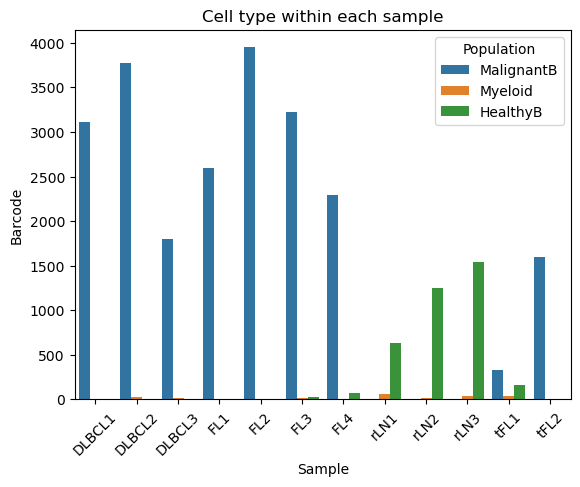

In [7]:
# Let's plot the type and number of cells within each sample
plt.figure()
sns.barplot(x = 'Sample',
            y = 'Barcode',
            data = cell_type_df ,
            hue = 'Population'
            )
plt.xticks(rotation = 45)
plt.title('Cell type within each sample')
plt.show()

This graph shows that while some samples are from patient with lymphoma, some cells within the sample can be considered healthy, id non malignant. The samples even contain some myeolid cells which are another type of blood cells than the lymphocytes. Lymphocytes being the type of blood cells where the lymphoma take their origin.

While here we ar interrested in the genes expression of B cells (the malignant cells in non-B-cells lymphoma), looking at the T-cells population might also be of interest. T-cells are a very important component of the B-cells in an healthy environement. It is reasonable to question whether they play a role in B-cell lymphoma (initiation, maintenance, or even transformation). This dataset contains some information about the T-cells population, we will try to include those into our analysis.
We will first take a look at the repartition of the T-cells population

In [8]:
# readiing the file about T-cells
T_Cells_df = pd.read_csv('data_FL/Annotation_tcells.csv', delimiter = ";")

In [9]:
T_Cells_df.head()

,Barcode,Sample,Population
0,AAACGGGTCTTGACGA,tFL2,TTOX
1,AAAGCAAAGGCGCTCT,tFL2,TTOX
2,AAATGCCGTAGCACGA,tFL2,TTOX
3,AACCATGGTACCAGTT,tFL2,TTOX
4,AAGTCTGAGATGGCGT,tFL2,TTOX


In [23]:
# Let's take a look at the T-cells repartion between the sample
T_cell_group_df = T_Cells_df.groupby(['Sample', 'Population']).count()['Barcode'].reset_index()

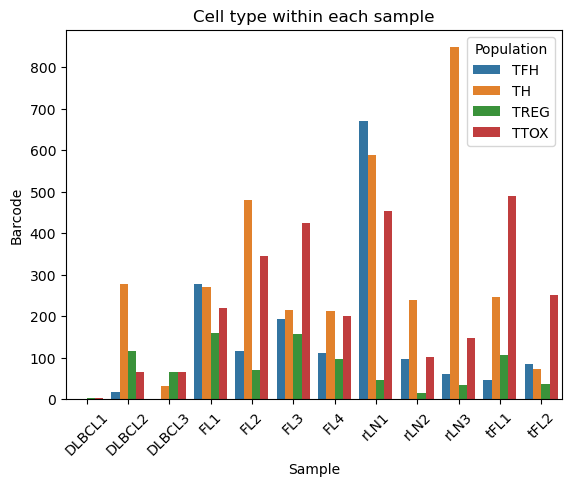

In [11]:
plt.figure()
sns.barplot(x = 'Sample',
            y = 'Barcode',
            data = T_cell_group_df ,
            hue = 'Population'
            )
plt.xticks(rotation = 45)
plt.title('Cell type within each sample')
plt.show()

From this graph we can see that 4 kind of T-cells have been ideentified in this dataset, with an hetergenous repartition of them anog the different samples.

In [12]:
# I will now have a look at the first file rLN1
# Each sample contains 3 files

In [13]:
# a genes.tsv file
rLN1_genes_df = pd.read_csv ("data_FL/rLN1/genes.tsv", sep = '\t', header = None)

In [14]:
var = rLN1_genes_df
var.index.name = 'Gene Name'
var.columns = ['EnsemblId','Gene Name Full']
var

,EnsemblId,Gene Name Full
Gene Name,,
0,ENSG00000243485,RP11-34P13.3
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8
...,...,...
33689,ENSG00000277856,AC233755.2
33690,ENSG00000275063,AC233755.1
33691,ENSG00000271254,AC240274.1


In [15]:
var.shape

(33694, 2)

In [16]:
# a barcodes.tsv file
rLN1_barcodes_df = pd.read_csv ("data_FL/rLN1/barcodes.tsv", sep = '\t', header = None, index_col = 0)
rLN1_barcodes_df.index.name = 'barcode'
rLN1_barcodes_df
obs = rLN1_barcodes_df
obs

""
barcode
AAACCTGCAAGGCTCC-1
AAACCTGCAGGTCGTC-1
AAACCTGGTTCCACTC-1
AAACCTGTCTGATACG-1
AAACGGGAGCGGCTTC-1
...
TTTGTCAGTAAGTGTA-1
TTTGTCAGTTTAAGCC-1
TTTGTCATCGCCGTGA-1


In [17]:
obs.shape

(3095, 0)

In [18]:
# a matrix.mtx
rLN1_adata = sc.read_mtx("data_FL/rLN1/matrix.mtx", dtype='float32')
rLN1_adata = rLN1_adata.T.copy() # Without copy - downstream does not work correctly 
rLN1_adata

AnnData object with n_obs × n_vars = 3095 × 33694

[ 41050.  41908.  42928.  43078.  46425.  46625.  47051.  47358.  47411.
  49224.  50040.  50448.  50858.  52534.  52590.  53780.  54591.  55100.
  55590.  56302.  56516.  56694.  57778.  59264.  59404.  60491.  63771.
  63947.  63973.  65711.  65810.  70035.  70244.  70383.  73686.  73994.
  75486.  78937.  83612.  85110.  89887.  89940.  91175.  93445.  94654.
  96384.  97180. 101330. 104668. 107356. 109385. 111006. 120783. 129180.
 131340. 168136. 169105. 276092. 359383. 555979.]


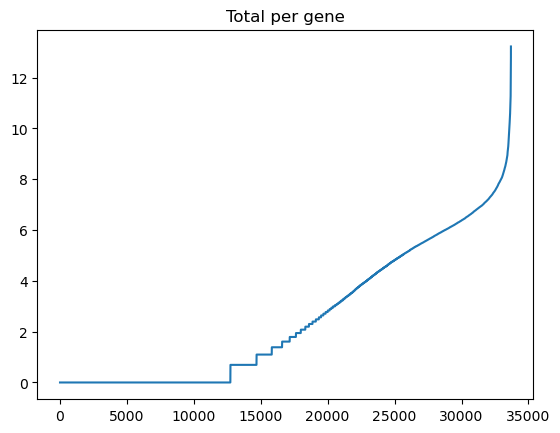

In [19]:
# we will take a look at the values in the matrix

# First take a look at the values in each row/cell 
v = rLN1_adata.X.sum(axis = 0)
v = np.sort(np.asarray(v).ravel() )
print(v[-60:])
plt.figure
plt.plot(np.log(1+v))
plt.title('Total per gene')
plt.show()

From the graph above we can see that a lot of genes are not expressed in any cell.

In [20]:
np.array(np.where(v == 0)).shape

(1, 12728)

From the above graph and calculation we can see that there 12728 cells which have a value of 0 for the expression of all the genes.

[21173. 21221. 21322. 21414. 21484. 21591. 21710. 21796. 21913. 22193.
 22210. 22255. 22366. 22372. 22530. 22676. 23235. 23380. 23486. 23533.
 23730. 23731. 23801. 23805. 24400. 24635. 25176. 25268. 25593. 25861.
 26148. 26534. 26695. 26823. 27302. 27513. 27531. 27938. 28158. 28714.
 28896. 29710. 30335. 31729. 31826. 32417. 33363. 34793. 35129. 35567.
 37414. 37751. 38341. 39855. 42006. 49109. 49431. 49596. 50195. 70057.]


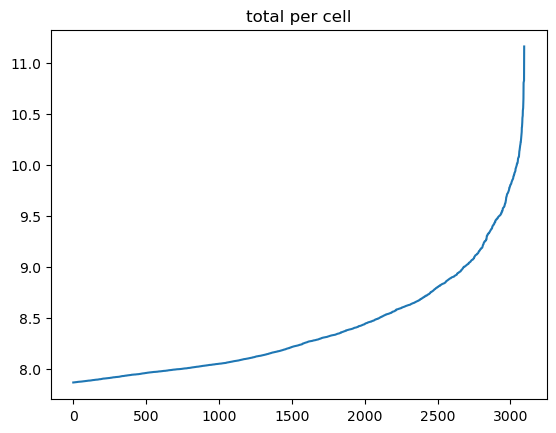

In [21]:
# then take a look at the value sin each column/gene
v = rLN1_adata.X.sum(axis = 1)
v = np.sort(np.asarray(v).ravel() )
print(v[-60:])
plt.plot(np.log(1+v))
plt.title('total per cell')
plt.show()

In [22]:
rLN1_adata.obs = obs
rLN1_adata.var = var
rLN1_adata

AnnData object with n_obs × n_vars = 3095 × 33694
    var: 'EnsemblId', 'Gene Name Full'

Frm the above analysis we can see that the sample rLN1 contains 3095 entries (each one being a single cell) and 33694 features which each of them is a gene. The values are the level of expression of each gene within a given cell.

I have now an Anndata object that I can use with the scanpy library. I will next loop the work over all the files available in this dataset to fully finish the exploration data analysis.